In [3]:
import numpy as np
import pandas as pd



In [4]:
match = head =pd.read_csv('/content/matches.csv')
delivery = pd.read_csv('/content/deliveries.csv.zip')

In [5]:
match.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [6]:
match.shape

(756, 18)

In [7]:
delivery.head

<bound method NDFrame.head of         match_id  inning         batting_team                 bowling_team  \
0              1       1  Sunrisers Hyderabad  Royal Challengers Bangalore   
1              1       1  Sunrisers Hyderabad  Royal Challengers Bangalore   
2              1       1  Sunrisers Hyderabad  Royal Challengers Bangalore   
3              1       1  Sunrisers Hyderabad  Royal Challengers Bangalore   
4              1       1  Sunrisers Hyderabad  Royal Challengers Bangalore   
...          ...     ...                  ...                          ...   
179073     11415       2  Chennai Super Kings               Mumbai Indians   
179074     11415       2  Chennai Super Kings               Mumbai Indians   
179075     11415       2  Chennai Super Kings               Mumbai Indians   
179076     11415       2  Chennai Super Kings               Mumbai Indians   
179077     11415       2  Chennai Super Kings               Mumbai Indians   

        over  ball    batsman non_striker      bowler  is_super_over  ...  \
0          1     1  DA Warner    S Dhawan    TS Mills              0  ...   
1          1     2  DA Warner    S Dhawan    TS Mills              0  ...   
2          1     3  DA Warner    S Dhawan    TS Mills              0  ...   
3          1     4  DA Warner    S Dhawan    TS Mills              0  ...   
4          1     5  DA Warner    S Dhawan    TS Mills              0  ...   
...      ...   ...        ...         ...         ...            ...  ...   
179073    20     2  RA Jadeja   SR Watson  SL Malinga              0  ...   
179074    20     3  SR Watson   RA Jadeja  SL Malinga              0  ...   
179075    20     4  SR Watson   RA Jadeja  SL Malinga              0  ...   
179076    20     5  SN Thakur   RA Jadeja  SL Malinga              0  ...   
179077    20     6  SN Thakur   RA Jadeja  SL Malinga              0  ...   

        bye_runs  legbye_runs  noball_runs  penalty_runs  batsman_runs  \
0              0            0            0             0             0   
1              0            0            0             0             0   
2              0            0            0             0             4   
3              0            0            0             0             0   
4              0            0            0             0             0   
...          ...          ...          ...           ...           ...   
179073         0            0            0             0             1   
179074         0            0            0             0             2   
179075         0            0            0             0             1   
179076         0            0            0             0             2   
179077         0            0            0             0             0   

        extra_runs  total_runs  player_dismissed dismissal_kind    fielder  
0                0           0               NaN            NaN        NaN  
1                0           0               NaN            NaN        NaN  
2                0           4               NaN            NaN        NaN  
3                0           0               NaN            NaN        NaN  
4                2           2               NaN            NaN        NaN  
...            ...         ...               ...            ...        ...  
179073           0           1               NaN            NaN        NaN  
179074           0           2               NaN            NaN        NaN  
179075           0           1         SR Watson        run out  KH Pandya  
179076           0           2               NaN            NaN        NaN  
179077           0           0         SN Thakur            lbw        NaN  

[179078 rows x 21 columns]>

In [8]:
total_score_df= delivery.groupby(['match_id','inning']).sum()['total_runs'].reset_index()

In [9]:
display(total_score_df)

,match_id,inning,total_runs
0,1,1,207
1,1,2,172
2,2,1,184
3,2,2,187
4,3,1,183
...,...,...,...
1523,11413,2,170
1524,11414,1,155
1525,11414,2,162
1526,11415,1,152


In [10]:
total_score_df= total_score_df[total_score_df['inning']==1]

In [11]:
total_score_df

,match_id,inning,total_runs
0,1,1,207
2,2,1,184
4,3,1,183
6,4,1,163
8,5,1,157
...,...,...,...
1518,11347,1,143
1520,11412,1,136
1522,11413,1,171
1524,11414,1,155


In [12]:
match_df=match.merge(total_score_df[['match_id','total_runs']],left_on='id',right_on='match_id')

In [13]:
match_df

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,207
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,2,184
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,3,183
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,4,163
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi,11347,143
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould,11412,136
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN,11413,171
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin,11414,155


In [14]:
match_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [15]:
teams = [
    'Sunrisers Hyderabad',
    'Mumbai Indians',
    'Royal Challengers Bangalore',
    'Kolkata Knight Riders',
    'Kings XI Punjab',
    'Chennai Super Kings',
    'Rajasthan Royals',
    'Delhi Capitals']

In [16]:
match_df['team1']=match_df['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df['team2']=match_df['team2'].str.replace('Delhi Daredevils','Delhi Capitals')

match_df['team1']=match_df['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match_df['team2']=match_df['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

In [17]:
match_df=match_df[match_df['team1'].isin(teams)]
match_df=match_df[match_df['team2'].isin(teams)]

In [18]:
match_df.shape

(641, 20)

In [19]:
match_df = match_df[match_df['dl_applied'] == 0]

In [20]:
match_df=match_df[['match_id','city','winner','total_runs']]

In [21]:
delivery_df = match_df.merge(delivery,on='match_id')

In [22]:
delivery_df= delivery_df[delivery_df['inning']==2]

In [23]:
delivery_df.shape

(72413, 24)

In [24]:
delivery_df['current_score']= delivery_df.groupby('match_id')['total_runs_y'].cumsum()

In [25]:
delivery_df['runs_left']= delivery_df['total_runs_x']-delivery_df['current_score']+1

In [26]:
delivery_df['balls_left']= 126 - (delivery_df['over']*6 + delivery_df['ball'])

In [27]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,1,0,1,NaN,NaN,NaN,1,207,119
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,NaN,1,207,118
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,NaN,1,207,117
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,2,0,2,NaN,NaN,NaN,3,205,116
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,4,0,4,NaN,NaN,NaN,7,201,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,1,0,1,NaN,NaN,NaN,152,1,4
149574,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,2,0,2,NaN,NaN,NaN,154,-1,3
149575,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,1,0,1,SR Watson,run out,KH Pandya,155,-2,2
149576,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,2,0,2,NaN,NaN,NaN,157,-4,1


In [28]:
delivery_df['player_dismissed']= delivery_df['player_dismissed'].fillna('0')
delivery_df['player_dismissed']= delivery_df['player_dismissed'].apply(lambda x:x if x=='0' else '1')
delivery_df['player_dismissed']= delivery_df['player_dismissed'].astype('int')
wickets= delivery_df.groupby('match_id')['player_dismissed'].cumsum().values
delivery_df['wickets']= 10-wickets
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1,0,1,0,NaN,NaN,1,207,119,10
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,207,118,10
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,207,117,10
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,2,0,2,0,NaN,NaN,3,205,116,10
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,4,0,4,0,NaN,NaN,7,201,115,10


In [29]:
delivery_df.tail()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets
149573,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,1,0,1,0,NaN,NaN,152,1,4,5
149574,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,2,0,2,0,NaN,NaN,154,-1,3,5
149575,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,1,0,1,1,run out,KH Pandya,155,-2,2,4
149576,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,2,0,2,0,NaN,NaN,157,-4,1,4
149577,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,6,SN Thakur,...,0,0,0,1,lbw,NaN,157,-4,0,3


In [30]:
#crr = runs/overs
# Recalculate 'balls_left' before calculating 'crr'
delivery_df['balls_left']= 126 - (delivery_df['over']*6 + delivery_df['ball'])
delivery_df['crr']= (delivery_df['current_score']*6)/(120 - delivery_df['balls_left'])

In [31]:
#rrr
delivery_df['rrr'] = (delivery_df['runs_left']*6)/delivery_df['balls_left']

In [32]:
def result(row):
  return 1 if row['batting_team']==row['winner'] else 0

Showing the Result In 0  Or   **1**

---



---



In [33]:
delivery_df['result']=delivery_df.apply(result,axis=1)

In [34]:
final_df = delivery_df[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr','result']]

In [35]:
final_df=final_df.sample(final_df.shape[0])

In [36]:
final_df.shape

(72413, 10)

## Guess Random Match to Check its work properly or not

In [37]:
final_df.sample()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
81339,Chennai Super Kings,Mumbai Indians,Mumbai,126,99,7,139,4.0,7.636364,0


In [38]:
final_df.dropna(inplace=True)

In [39]:
final_df=final_df[final_df['balls_left']!=0]

In [40]:
X = final_df.iloc[:,:-1]
Y = final_df.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [41]:
X_train

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr
63226,Chennai Super Kings,Rajasthan Royals,Chennai,91,73,9,146,7.148936,7.479452
4028,Kings XI Punjab,Sunrisers Hyderabad,Chandigarh,40,10,3,207,9.163636,24.000000
116852,Kings XI Punjab,Mumbai Indians,Chandigarh,95,48,8,189,7.916667,11.875000
41005,Rajasthan Royals,Chennai Super Kings,Chennai,224,101,10,246,7.263158,13.306931
77754,Delhi Daredevils,Kings XI Punjab,Dharamsala,160,102,9,171,4.000000,9.411765
...,...,...,...,...,...,...,...,...,...
92717,Chennai Super Kings,Delhi Daredevils,Delhi,103,56,10,178,7.125000,11.035714
11736,Delhi Daredevils,Chennai Super Kings,Chennai,68,64,10,169,10.928571,6.375000
135361,Chennai Super Kings,Royal Challengers Bangalore,Chennai,74,112,10,74,0.750000,3.964286
26204,Deccan Chargers,Chennai Super Kings,East London,127,85,7,178,8.914286,8.964706


In [42]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
trf = ColumnTransformer([
    ('trf',OneHotEncoder(drop='first'),['batting_team','bowling_team','city'])
]
,remainder='passthrough')

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [44]:
pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',LogisticRegression(solver='liblinear'))
])

In [45]:
pipe.fit(X_train,Y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first'),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [46]:
Y_pred = pipe.predict(X_test)

Check **Accuracy**

In [47]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_pred)

0.8063634452309202

In [48]:
pipe.predict_proba(X_test)[7]

array([0.80487532, 0.19512468])

In [49]:
def match_summary(row):
    print("Batting Team-" + row['batting_team'] + " | Bowling Team-" + row['bowling_team'] + " | Target- " + str(row['total_runs_x']))

In [50]:
def match_progression(x_df,match_id,pipe):
    match = x_df[x_df['match_id'] == match_id]
    match = match[(match['ball'] == 6)]
    temp_df = match[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr']].dropna()
    temp_df = temp_df[temp_df['balls_left'] != 0]
    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0]*100,1)
    temp_df['win'] = np.round(result.T[1]*100,1)
    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)

    target = temp_df['total_runs_x'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0,target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    wickets = list(temp_df['wickets'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]

    print("Target-",target)
    temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win']]
    return temp_df,target

In [51]:
temp_df,target = match_progression(delivery_df,74,pipe)
temp_df

Target- 178


,end_of_over,runs_after_over,wickets_in_over,lose,win
10459,1,3,0,57.6,42.4
10467,2,8,0,52.5,47.5
10473,3,1,0,59.1,40.9
10479,4,7,1,70.5,29.5
10485,5,12,0,60.6,39.4
10491,6,13,0,48.4,51.6
10497,7,9,0,42.5,57.5
10505,8,15,0,28.5,71.5
10511,9,7,0,26.3,73.7
10518,10,17,0,14.5,85.5


Text(0.5, 1.0, 'Target-178')

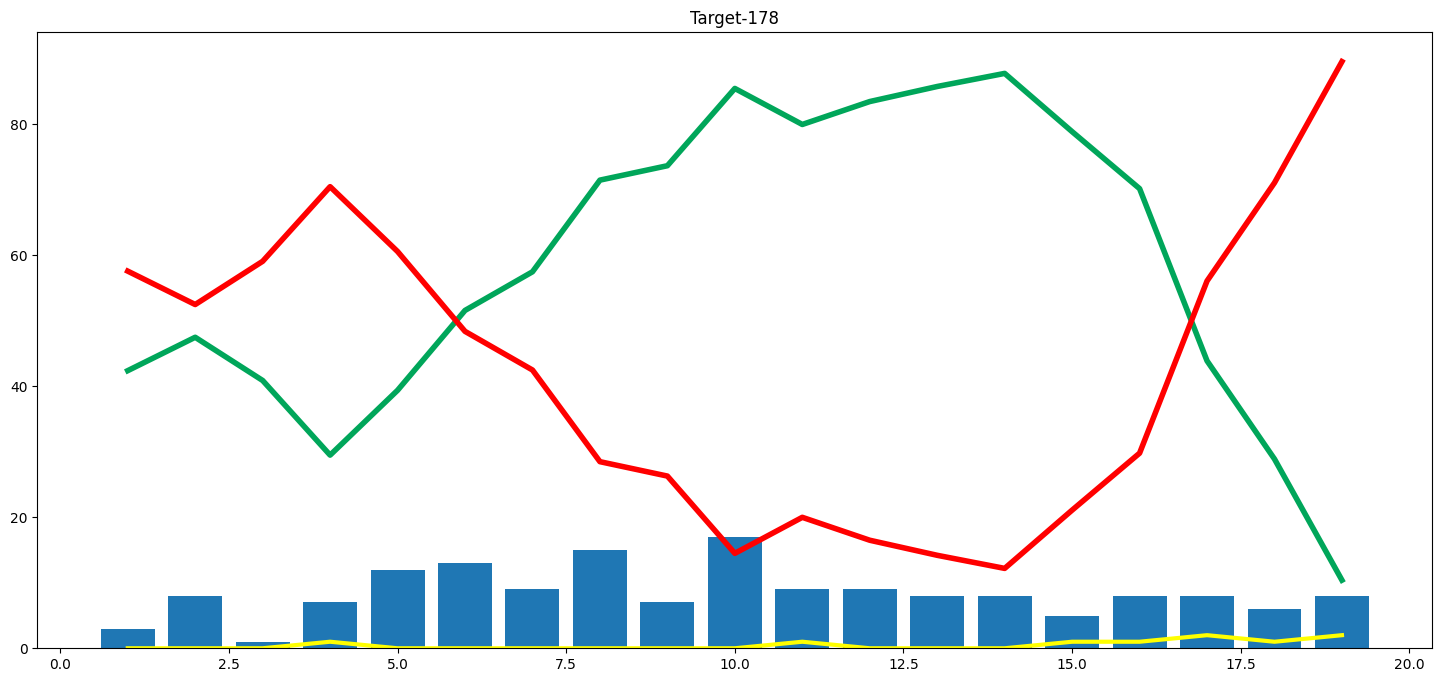

In [52]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df['end_of_over'],temp_df['win'],color='#00a65a',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4)
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.title('Target-' + str(target))

In [53]:
teams

['Sunrisers Hyderabad',
 'Mumbai Indians',
 'Royal Challengers Bangalore',
 'Kolkata Knight Riders',
 'Kings XI Punjab',
 'Chennai Super Kings',
 'Rajasthan Royals',
 'Delhi Capitals']

In [54]:
delivery_df['city'].unique()

array(['Hyderabad', 'Bangalore', 'Mumbai', 'Indore', 'Kolkata', 'Delhi',
       'Chandigarh', 'Jaipur', 'Chennai', 'Cape Town', 'Port Elizabeth',
       'Durban', 'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi', 'Abu Dhabi',
       'Sharjah', nan, 'Mohali', 'Bengaluru'], dtype=object)

In [55]:

import pickle
pickle.dump(pipe,open('pipe.pkl','wb'))

In [56]:
import sklearn

In [57]:
print(sklearn.__version__)

1.6.1
